# Init.py

In [1]:
from agents import DeepQLearning
from agents import DQN, deeperDQN
from envs import *
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from memory import Transition
from memory import ReplayMemory
import matplotlib.pyplot as plt
from itertools import count
import torch.optim as optim
import matplotlib

is_ipython = 'inline' in matplotlib.get_backend()

DISCOUNT = 0.99
gamma = 0.99
EPS_INIT = 0.95
EPS_LOWER_BOUND = 0.05
ANNEAL = 0.0001
EPISODE_NUM = 50
BUFFER_SIZE = 10000
LEARNING_RATE = 0.001
DEVICE = 'cpu'
device = "cpu"
BATCH_SIZE = 32
C = 10
action_selection = ['action1','action2','action3','action4','action5','action6', 'action7', 'action8', 'action9', 'action10']
num_action = 10

In [3]:
def optimizer_pytorch():
    
  if len(memory) < batch_size:
    return  

  transitions = memory.sample(batch_size)
    
  batch = Transition(*zip(*transitions))

  non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device = device, dtype = torch.bool)
    
  non_final_next_states = torch.cat([s for s in batch.next_state if s is not None]).to(device)

  state_batch = torch.cat(batch.state).to(device)
    
  action_batch = torch.cat(batch.action)

  action_batch_long = torch.tensor(action_batch, dtype = torch.int64).to(device)
    
  reward_batch = torch.cat(batch.reward)
  
  state_action_values = policy_net(state_batch).gather(1, action_batch_long)

  next_state_values = torch.zeros(batch_size, device = device)
    
  next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()

  expected_state_action_values = (next_state_values * gamma) + reward_batch

  criterion = nn.MSELoss()

  loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))
    
  total_loss.append(loss)

  optimizer.zero_grad()
    
  loss.backward()
  for param in policy_net.parameters():
    param.grad.data.clamp_(-1, 1)
    
  optimizer.step()


In [4]:
def select_action(state):
    with torch.no_grad():
        return policy_net(state).max(1)[1].view(1, 1)

# Main.py

In [7]:
batch_size = 256
gamma = 0.99
C = 3
n_actions = 10

num_episodes = 100
total_loss = []

action_selection = ['action1','action2','action3','action4','action5','action6', 'action7', 'action8', 'action9', 'action10']
num_action = 10

batch_size = 256
gamma = 0.99

target_update = 3

n_actions = 10

current_s = torch.Tensor([0])

policy_net = deeperDQN().to(device)
target_net = deeperDQN().to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.SGD(policy_net.parameters(), lr = 1e-3)
memory = ReplayMemory(10000)

steps_done = 0
episode_durations = []

def select_action(state):
  with torch.no_grad():
    return policy_net(state).max(1)[1].view(1, 1)    


    
optimizer = optim.SGD(policy_net.parameters(), lr = 1e-3)

memory = ReplayMemory(10000)

for i in range(num_episodes):
    
  location = 0

  old_state = torch.tensor([[0]])
    
  nst = 0

  fuel = 299
    
  for t in count():
    
    index = int(select_action(torch.Tensor([[nst]]).to(device)).item()) 
    
    temp = action_selection[index]
    
    v, theta = action[temp]
    
    nst, reward_c, done, _ = env(location, temp, fuel)
    
    nst = torch.Tensor([[nst]])
    
    resistance = state_resistance(v)
    
    location = location + distance(v, theta, resistance)
    
    reward_c = torch.tensor([[reward_c]], device = device)

    if not done:
      nst = nst
    
    else:
        
      nst = None

    print(nst)
    
    temp_t = torch.Tensor([[index]])
    memory.push(old_state, temp_t, nst, reward_c)

    old_state = nst

    optimizer_pytorch ()
    
    if done:
        break
    

  if i % C == 0:
    target_net.load_state_dict(policy_net.state_dict())
  
print('Complete')

tensor([[5.3158]])
tensor([[10.6316]])
tensor([[14.6042]])
tensor([[19.9200]])
tensor([[22.1270]])
tensor([[27.4428]])
tensor([[31.4154]])
tensor([[36.7312]])
tensor([[40.7038]])
tensor([[46.0196]])
tensor([[51.3354]])
tensor([[56.1698]])
win
None
tensor([[5.3158]])
tensor([[8.4939]])
tensor([[13.8097]])
tensor([[19.1255]])
tensor([[24.4413]])
tensor([[29.7571]])
tensor([[33.7297]])
tensor([[39.0455]])
tensor([[41.2525]])
tensor([[45.2251]])
tensor([[49.4625]])
tensor([[54.7783]])
win
None
tensor([[5.3158]])
tensor([[10.6316]])
tensor([[15.9474]])
tensor([[19.9200]])
tensor([[24.7544]])
tensor([[29.5888]])
tensor([[34.9047]])
tensor([[40.2205]])
tensor([[44.1931]])
tensor([[46.4000]])
tensor([[51.7159]])
tensor([[57.0317]])
win
None
tensor([[3.9726]])
tensor([[7.9452]])
tensor([[11.9178]])
tensor([[15.8904]])
tensor([[20.7248]])
tensor([[26.0406]])
tensor([[31.3564]])
tensor([[35.3290]])
tensor([[40.6448]])
tensor([[44.8822]])
tensor([[49.1197]])
tensor([[53.3571]])
tensor([[57.3297]])

/tmp/ipykernel_21418/2557447024.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  action_batch_long = torch.tensor(action_batch, dtype = torch.int64).to(device)
/mnt/disk1/jaejun/cyclegan/lib/python3.8/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([256, 1, 256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


win
None
tensor([[5.3158]])
tensor([[10.6316]])
tensor([[14.6042]])
tensor([[18.5768]])
tensor([[22.5494]])
tensor([[27.8652]])
tensor([[33.1810]])
tensor([[37.1536]])
tensor([[42.4694]])
tensor([[47.3038]])
tensor([[52.6196]])
tensor([[55.7977]])
win
None
tensor([[5.3158]])
tensor([[10.6316]])
tensor([[14.6042]])
tensor([[19.9200]])
tensor([[23.0981]])
tensor([[27.0707]])
tensor([[30.2488]])
tensor([[35.5646]])
tensor([[39.5372]])
tensor([[44.8530]])
tensor([[48.8256]])
tensor([[52.0036]])
tensor([[55.1817]])
tensor([[58.3598]])
lose
None
tensor([[5.3158]])
tensor([[9.2884]])
tensor([[14.6042]])
tensor([[18.5768]])
tensor([[22.5494]])
tensor([[26.7868]])
tensor([[30.7594]])
tensor([[34.7320]])
tensor([[40.0478]])
tensor([[45.3636]])
tensor([[47.5706]])
tensor([[52.8864]])
tensor([[57.7208]])
win
None
tensor([[5.3158]])
tensor([[9.2884]])
tensor([[14.6042]])
tensor([[19.9200]])
tensor([[25.2358]])
tensor([[29.4733]])
tensor([[34.7891]])
tensor([[39.6235]])
tensor([[44.9393]])
tensor([[

tensor([[24.3843]])
tensor([[29.2187]])
tensor([[31.4257]])
tensor([[36.7415]])
tensor([[40.9789]])
tensor([[44.9515]])
tensor([[48.1296]])
tensor([[52.9640]])
tensor([[55.1710]])
win
None
tensor([[5.3158]])
tensor([[9.2884]])
tensor([[13.2610]])
tensor([[18.5768]])
tensor([[22.5494]])
tensor([[26.5220]])
tensor([[31.3564]])
tensor([[35.3290]])
tensor([[38.5071]])
tensor([[42.1192]])
tensor([[45.2973]])
tensor([[47.5043]])
tensor([[52.3387]])
tensor([[55.5168]])
tensor([[57.7238]])
win
None
tensor([[3.9726]])
tensor([[7.9452]])
tensor([[11.1233]])
tensor([[15.0959]])
tensor([[19.0684]])
tensor([[21.2754]])
tensor([[26.5913]])
tensor([[29.7693]])
tensor([[34.6037]])
tensor([[37.7818]])
tensor([[42.6162]])
tensor([[46.2284]])
tensor([[51.0628]])
tensor([[55.8972]])
win
None
tensor([[2.2070]])
tensor([[6.1796]])
tensor([[8.3866]])
tensor([[11.5647]])
tensor([[14.7427]])
tensor([[17.9208]])
tensor([[22.7552]])
tensor([[26.7278]])
tensor([[28.9348]])
tensor([[32.9074]])
tensor([[36.0855]])


tensor([[54.3472]])
tensor([[57.5253]])
win
None
tensor([[3.9726]])
tensor([[7.9452]])
tensor([[12.7796]])
tensor([[15.9577]])
tensor([[19.1358]])
tensor([[22.3138]])
tensor([[27.6296]])
tensor([[32.9454]])
tensor([[36.5576]])
tensor([[39.7357]])
tensor([[43.7083]])
tensor([[45.9153]])
tensor([[49.0933]])
tensor([[54.4091]])
tensor([[57.4989]])
win
None
tensor([[3.9726]])
tensor([[9.2884]])
tensor([[13.2610]])
tensor([[17.2336]])
tensor([[20.4117]])
tensor([[24.3843]])
tensor([[29.7001]])
tensor([[31.9071]])
tensor([[35.8797]])
tensor([[39.8522]])
tensor([[42.0592]])
tensor([[46.8937]])
tensor([[50.0717]])
tensor([[54.9062]])
win
None
tensor([[3.1781]])
tensor([[5.3851]])
tensor([[8.5631]])
tensor([[10.7701]])
tensor([[13.9482]])
tensor([[16.1552]])
tensor([[18.3622]])
tensor([[20.5692]])
tensor([[22.7762]])
tensor([[24.9832]])
tensor([[28.1613]])
tensor([[32.1339]])
tensor([[36.9683]])
tensor([[39.1753]])
tensor([[44.4911]])
tensor([[48.1032]])
tensor([[51.2813]])
tensor([[53.4883]])


tensor([[52.2261]])
tensor([[57.0605]])
win
None
Complete


In [136]:
steps_done = 0
olt = 0
old_state_t = torch.tensor([[0]], device = device)
next_state_t = torch.tensor([[0]], device = device)
temp = []
temp.append(0)

temp_height = []
temp_height.append(0)

fuel = 299

while not is_terminate(fuel, next_state_t):
    
  old_location_t = next_state_t

  ost = torch.Tensor([[olt]]).to(device)
    
  it = int(select_action(ost).item())

  at = action_selection[it]
    
  velo, theta = action[at]

  resistance = state_resistance(v)
    
  next_state_t = old_location_t + distance(velo, theta, resistance)
  
  next_state_height = ((velo-resistance)*np.sin(theta))**2/2*9.81

  print(next_state_t)
  fuel -= 10
  
  temp_height.append(next_state_height.item())
  temp_height.append(0)
    
  temp.append(next_state_t.item()/2)
    
  temp.append(next_state_t.item())

print('end')

tensor([[6.2332]])
tensor([[8.3520]])
tensor([[14.5852]])
tensor([[20.1468]])
tensor([[21.8441]])
tensor([[23.9629]])
tensor([[26.0816]])
tensor([[31.6432]])
tensor([[37.8764]])
tensor([[39.5737]])
tensor([[41.6925]])
tensor([[43.8112]])
tensor([[45.5085]])
tensor([[51.0701]])
tensor([[57.3034]])
tensor([[62.8650]])
win
end


(0.0, 750.0)

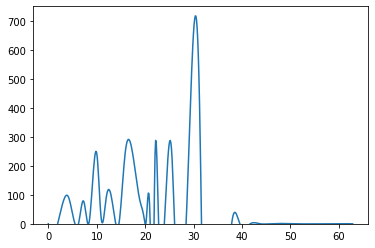

In [138]:
from scipy.interpolate import interp1d

x = np.array(temp)
y = np.array(temp_height)
cubic_interpolation_model = interp1d(x, y, kind = "cubic")
X_=np.linspace(x.min(), x.max(), 500)
Y_=cubic_interpolation_model(X_)

plt.plot(X_, Y_)
plt.ylim([0,750])